<a href="https://colab.research.google.com/github/lxxhxng/aipython/blob/main/240112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 폰트설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 드라이브 mount

In [69]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# Import

In [144]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic') # 한글 글꼴 설정

import pandas as pd
import numpy as np
import seaborn as sns

# 1. 붓꽃 데이터 분석

## 데이터 설명
- 붓꽃의 3가지 종(setoda, versicolor, viginica)을 각각의 특성에 맞게 분류되어 있음
- 꽃잎의 부분의 너비와 길이를 측정한 데이터
- 150개의 레코드로 구성


## 필드의 이해
총 5개의 필드로 구성되어 있습니다.

| 필드명        | 설명                   |
|--------------|------------------------|
| Sepal length | 꽃받침 길이 정보        |
| Sepal width  | 꽃받침 너비 정보        |
| Petal length | 꽃잎 길이 정보          |
| Petal width  | 꽃잎 너비 정보          |
| species      | 꽃의 종류              |


## • 붓꽃 데이터 읽어와서 확인하기

### 1.데이터 파일 읽어오기

In [145]:
df_iris = pd.read_csv('/content/gdrive/MyDrive/겨울계절_파이썬기초/data_10일차/iris.csv')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2.데이터의 기본 정보 출력

In [146]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 3.데이터의 기초 통계량 출력

In [147]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 4.픔종별 개수 구하기

In [148]:
pd.DataFrame(df_iris['species'].value_counts())

,species
setosa,50
versicolor,50
virginica,50


## • 붓꽃 데이터 전처리

### 1.결측치 학인하기

In [149]:
df_iris.isna().sum()
# 결측치 없음

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### 2.중복 데이터 확인하기

In [151]:
# 중복된 행 확인
df_iris.duplicated().sum()

1

### 3.중복 데이터 모두 확인하기

In [152]:
duplicate_rows = df_iris[df_iris.duplicated(keep=False)]
duplicate_rows

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


### 4.중복 데이터 삭제하기

In [153]:
# 중복 데이터 삭제
df_iris.drop_duplicates(inplace=True)

In [154]:
# 중복 데이터 삭제 확인
duplicate_rows = df_iris[df_iris.duplicated(keep=False)]
duplicate_rows

,sepal_length,sepal_width,petal_length,petal_width,species


## • 붓꽃 데이터 그룹핑

### 1.품종(species) 열을 기준으로 합계 구하기

In [155]:
df_iris.groupby('species').sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,323.6,146.0,272.5,99.4


### 2.품종(species) 열을 기준으로 평균 구하기

In [156]:
df_iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


## • 붓꽃 데이터 시각화

### 1.꽃받침 길이(막대 그래프)

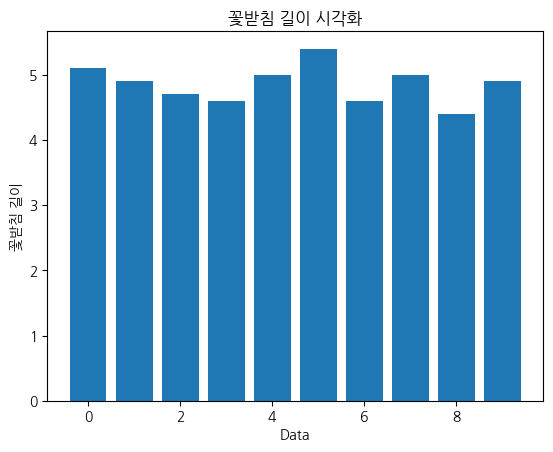

In [157]:
# 맨 위의 10개 데이터 선택
top_10_data = df_iris.head(10)

# 막대그래프 시각화
plt.bar(top_10_data.index, top_10_data['sepal_length'])

# 그래프 제목과 축 레이블 설정
plt.title('꽃받침 길이 시각화')
plt.xlabel('Data')
plt.ylabel('꽃받침 길이')

# 그래프 출력
plt.show()

### 2.종류별 꽃받침 길이의 평균(막대 그래프)

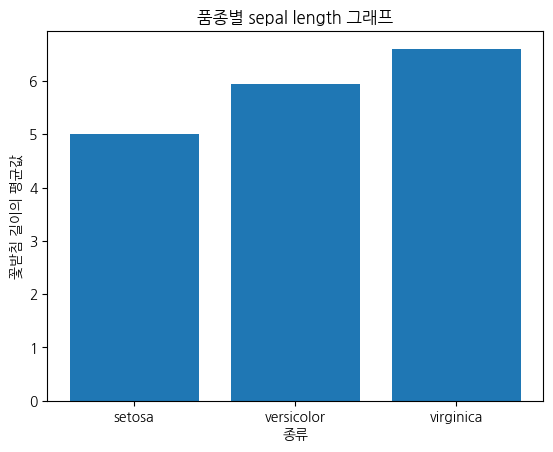

In [158]:
# 종별 꽃받침 길이의 평균 계산
avg_sepal_length_by_species = df_iris.groupby('species')['sepal_length'].mean()

# 막대그래프 시각화
plt.bar(avg_sepal_length_by_species.index, avg_sepal_length_by_species)

# 그래프 제목과 축 레이블 설정
plt.title('품종별 sepal length 그래프')
plt.xlabel('종류')
plt.ylabel('꽃받침 길이의 평균값')

# 그래프 출력
plt.show()

### 3.각 특징 값들의 빈도수(히스토그램)

### 4.꽃받침의 길이와 꽃잎의 길이 시각화(산점도)

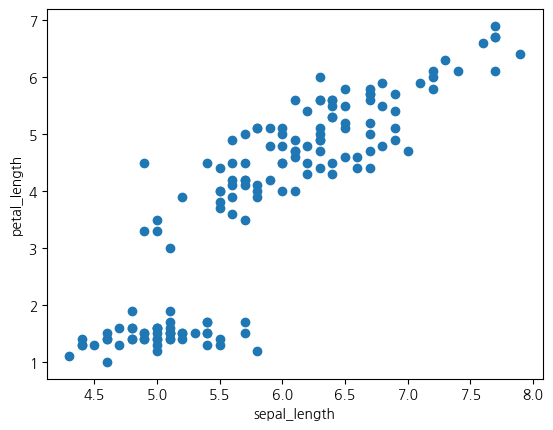

In [159]:
# 꽃받침의 길이와 꽃잎의 길이의 산점도 시각화
plt.scatter(df_iris['sepal_length'], df_iris['petal_length'])

# 축 레이블 설정
plt.xlabel('sepal_length')
plt.ylabel('petal_length')

# 그래프 출력
plt.show()

# 타이타닉 데이터 분석

## 데이터 설명
- DS나 ML 분야에 입문자용 데이터셋
- 캐글(Kaggle)에서 가장 많이 사용된 데이터로 사용됨
- 타이타닉호 사건의 사망자와 생존자를 구분하는 요인 분석을 통해 승객들의 생존 여부를 예측해 본다


## 필드의 이해
총 16개의 필드로 구성되어 있습니다.

| 필드명       | 설명                                         |
|--------------|----------------------------------------------|
| passengerId  | 승객 번호                                    |
| Survived     | 생존 여부: 0이면 사망, 1이면 생존              |
| Pclass       | 객실 등급: 1이면 1등급, 2이면 2등급, 3이면 3등급  |
| Sex          | 성별: male이면 남자, female이면 여자            |
| Age          | 나이                                         |
| SibSp        | 함께 탑승한 형제 및 배우자 수                 |
| Parch        | 함께 탑승한 자녀 및 부모 수                 |
| Fare         | 탑승 요금                                    |                                         
| Embarked     | 탑승지 이름 앞글자: C는 Cherbourg, Q는 Queenstown, S는 Southampton |
| Class        | 객실 등급: First면 1등급, Second면 2등급, Third면 3등급 |
| Who          | 남자, 여자, 아이: man, woman, child            |
| adult_male   | 성인 남자인지 여부: True면 성인 남자, False면 그외 |
| Deck         | 선실 번호 첫 알파벳: A, B, C, D, E, F, G        |
| Embark_town  | 탑승지 이름: Cherbourg, Queenstown, Southampton |
| Alive        | 생존 여부: no면 사망, yes면 생존               |
| Alone        | 혼자 탑승했는지 여부: True면 혼자 탑승, False면 가족과 함께 탑승 |


## • 타이타닉 데이터 읽어와서 확인하기

### 1.데이터 파일 읽어오기

In [160]:
df_titanic = pd.read_csv('/content/gdrive/MyDrive/겨울계절_파이썬기초/data_9일차/titanic.csv')
df_titanic.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 2.데이터의 기본 정보 출력

In [161]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


### 3.데이터의 기초 통계량 출력

In [162]:
df_titanic.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4.요금(fare) 기준 내림차순 정렬

In [163]:
df_titanic.sort_values(by=['fare'], ascending=False)

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
679,679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
88,88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
27,27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,633,0,1,male,NaN,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
413,413,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
822,822,0,1,male,38.0,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
732,732,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True


### 5.생존자별 인원수 확인

In [164]:
pd.DataFrame(df_titanic['survived'].value_counts())

,survived
0,549
1,342


## • 타이타닉 데이터 전처리

### 1.결측치 학인하기

In [165]:
df_titanic.isna().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### 2.컬럼 삭제하기
• 결측치가 많은 ‘Deck’ 컬럼 삭제

In [166]:
df_titanic.drop('deck', axis=1, inplace=True)
df_titanic.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### 3.최빈값 대체하기
• 결측치가 작은 ‘Embarked’ 컬럼에 결측치를 최빈값으로 대체

In [167]:
df_titanic['embarked'].value_counts()
# 최빈값은 'S'

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [168]:
# 'Embarked' 컬럼의 결측치를 최빈값으로 대체
df_titanic['embarked'].fillna('S', inplace=True)

# 결고 확인
df_titanic.isnull().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

### 4.평균값 대체하기
• 나이의 결측치를 평균 데이터로 대체

In [169]:
# 'Age' 컬럼의 결측치를 평균값으로 대체
mean_age = df_titanic['age'].mean()
df_titanic['age'].fillna(mean_age, inplace=True)

# 결과 확인
df_titanic.isnull().sum()

Unnamed: 0     0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

## • 타이타닉 데이터 그룹핑


### 1.항구(embarked)별 pclass 의 평균값 구하기


In [170]:
df_titanic.groupby('embarked')['pclass'].mean()

embarked
C    1.886905
Q    2.909091
S    2.346749
Name: pclass, dtype: float64

### 2.pclass, sex 컬럼 기준으로 평균 구하기

In [171]:
df_titanic.groupby(['pclass', 'sex']).mean(numeric_only=True)

Unnamed: 0  survived        age     sibsp     parch  \
pclass sex                                                           
1      female  468.212766  0.968085  34.141405  0.553191  0.457447   
       male    454.729508  0.368852  39.287717  0.311475  0.278689   
2      female  442.105263  0.921053  28.748661  0.486842  0.605263   
       male    446.962963  0.157407  30.653908  0.342593  0.222222   
3      female  398.729167  0.500000  24.068493  0.895833  0.798611   
       male    454.515850  0.135447  27.372153  0.498559  0.224784   

                     fare  adult_male     alone  
pclass sex                                       
1      female  106.125798    0.000000  0.361702  
       male     67.226127    0.975410  0.614754  
2      female   21.970121    0.000000  0.421053  
       male     19.741782    0.916667  0.666667  
3      female   16.118810    0.000000  0.416667  
       male     12.661633    0.919308  0.760807

## • 타이타닉 데이터 시각화

### 1.좌석 등급별 생존자 확인(막대 그래프)

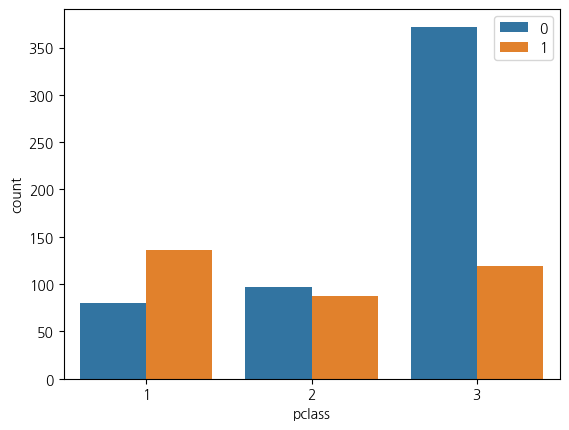

In [172]:
# 막대 그래프 그리기
sns.countplot(x='pclass', hue='survived', data=df_titanic)

# 그래프 제목과 축 레이블 설정
plt.xlabel('pclass')
plt.ylabel('count')

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()

### 2.히트맵 그리기, 푸른색으로

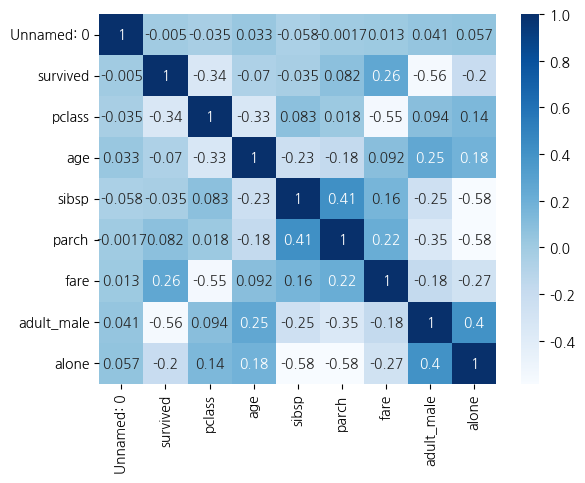

In [173]:
# 히트맵 그리기
df=df_titanic.corr(numeric_only=True)
sns.heatmap(data=df, annot=True, cmap='Blues')
plt.rcParams['axes.unicode_minus'] = False

# 그래프 출력
plt.show()